In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import plotting_common
import math

In [2]:
plotting_common.setup_plotting_style()

In [3]:
df = pd.read_json("data/state-space-sizes.json")
df["positions"] = np.zeros_like(df["solvable_at"])
df["reachable"] = np.zeros_like(df["solvable_at"])

total_holes = 33
for nr_pegs in range(0, 34):
    df.loc[nr_pegs, "positions"] = math.comb(total_holes, nr_pegs)
    df.loc[nr_pegs, "reachable"] = df.loc[total_holes - nr_pegs, "solvable_at"]

df = df[1:33]

In [4]:
total_positions = np.sum(df["positions"])
total_solvable = np.sum(df["solvable_at"])

print(f"{total_solvable / total_positions * 100:.2f}% of positions are solvable")

2.18% of positions are solvable


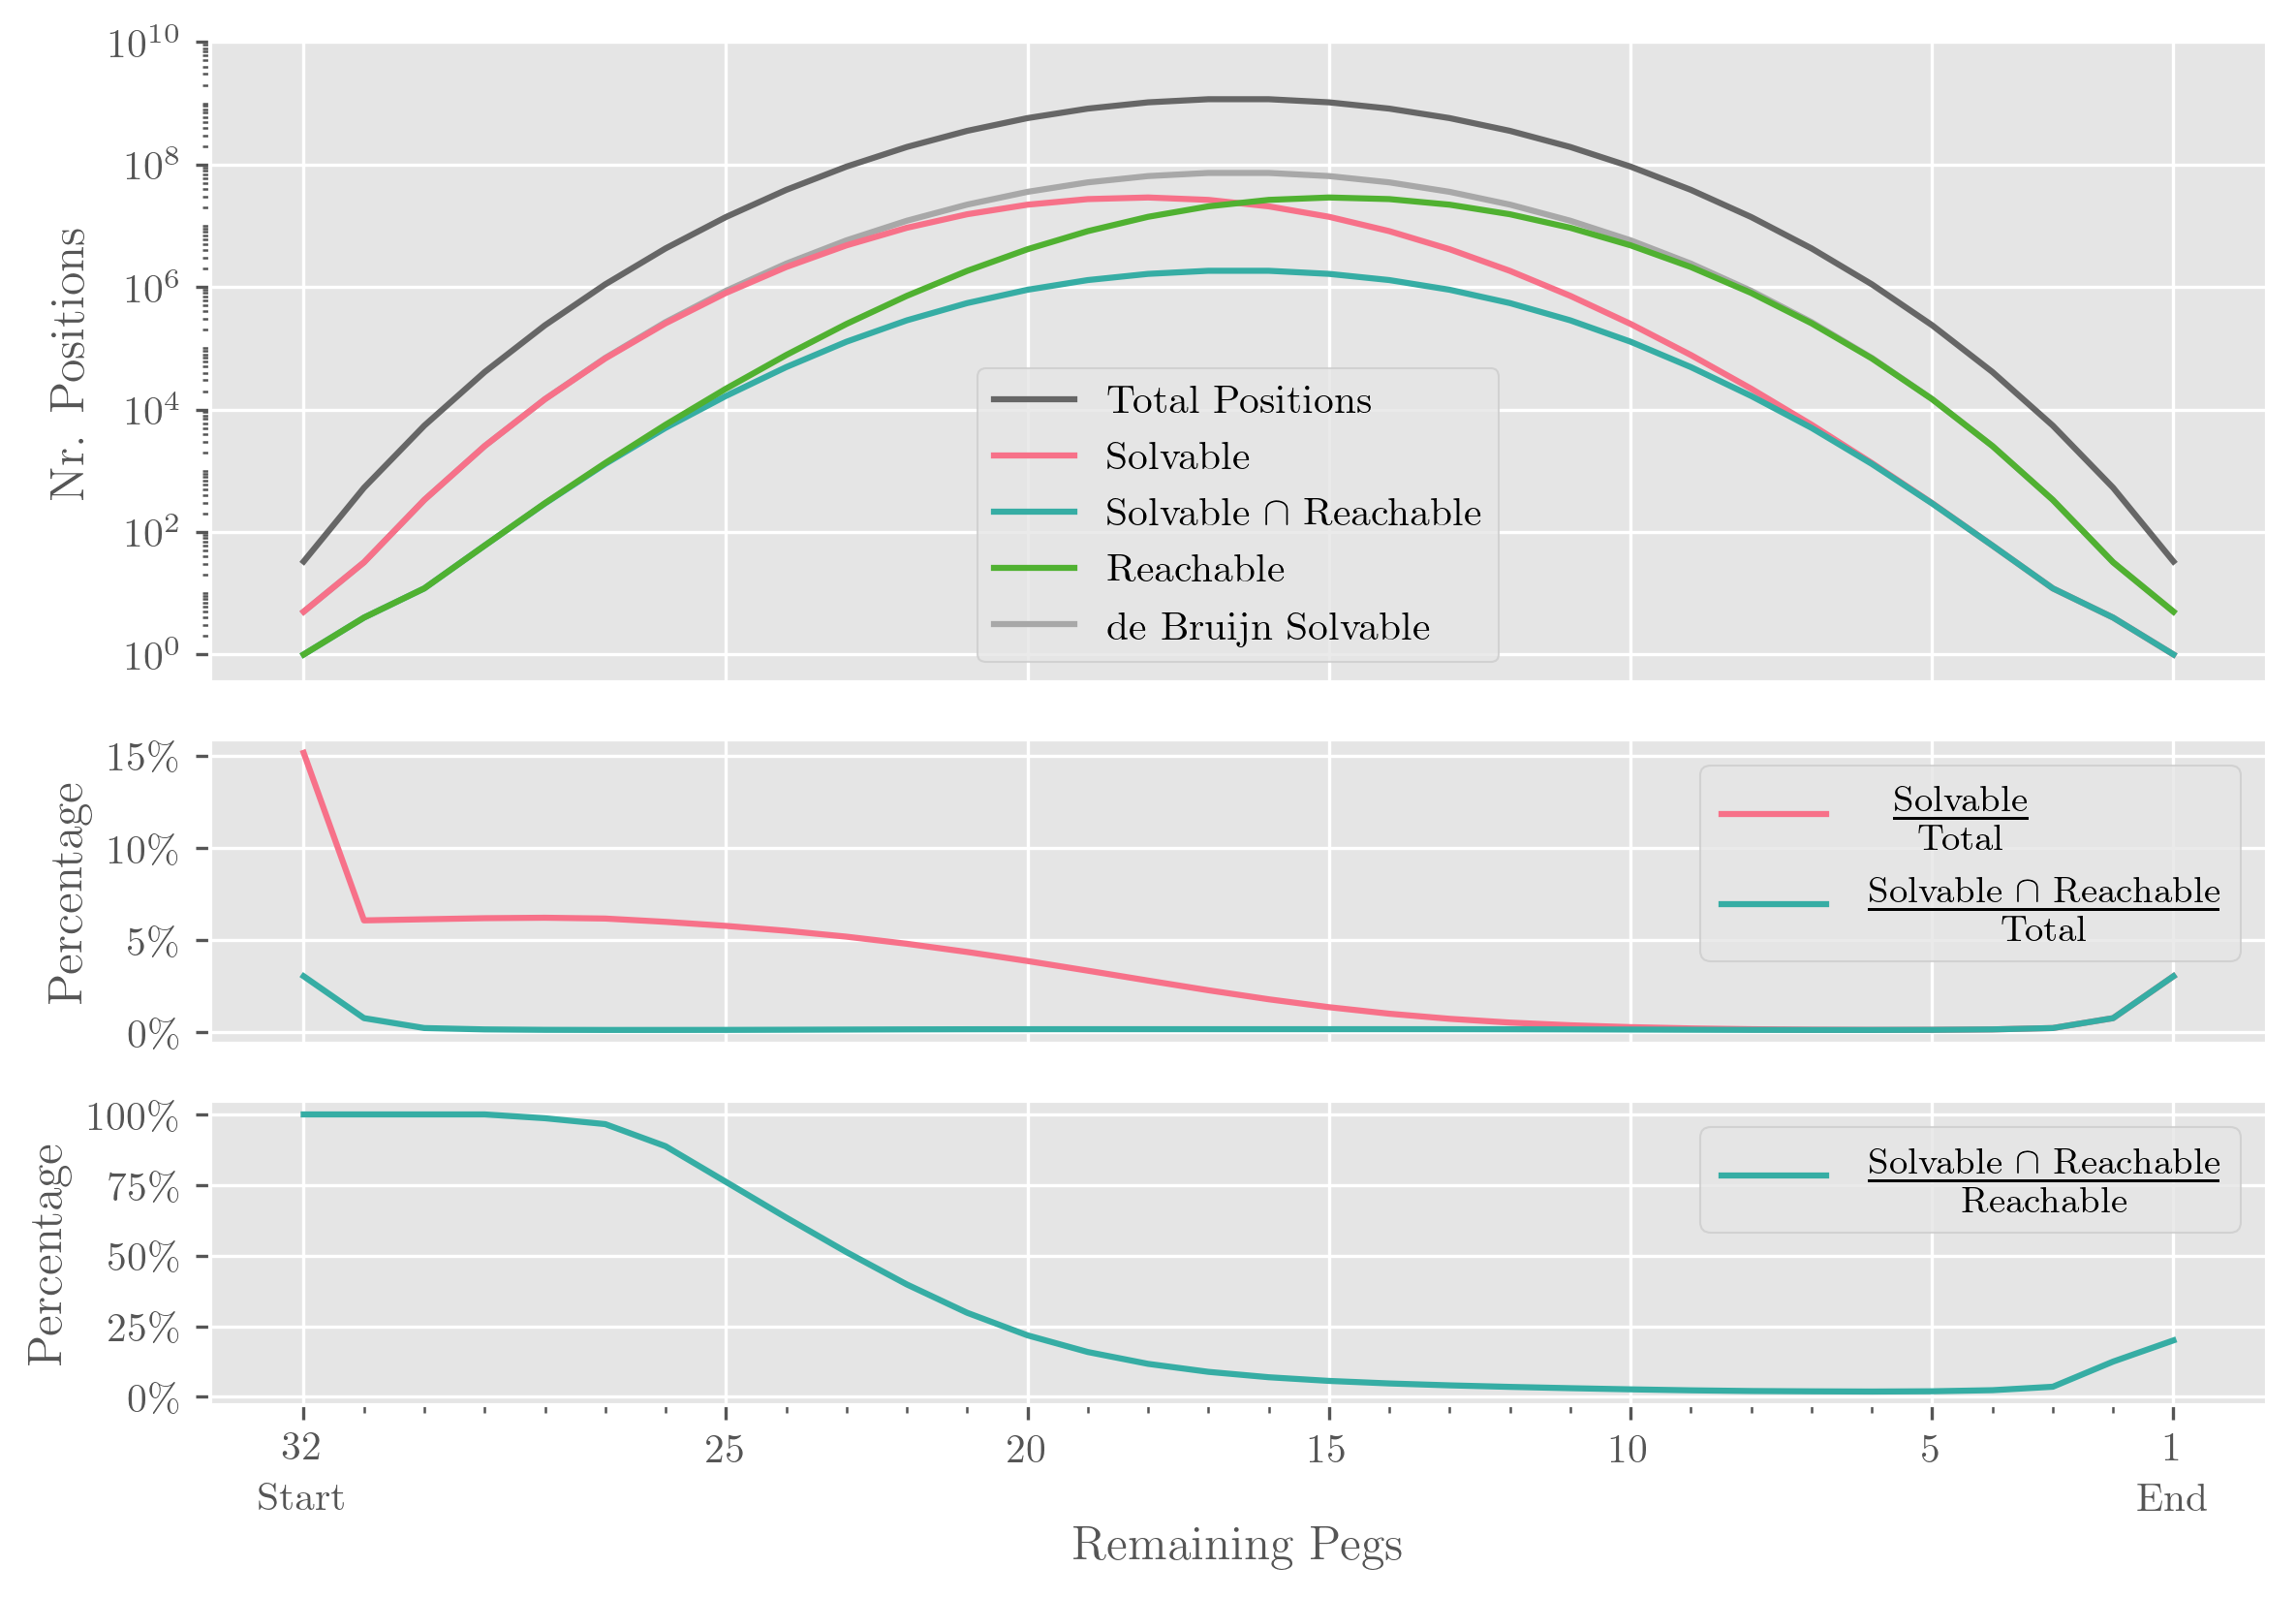

In [23]:
pegs = np.arange(1, 33)

gs = gridspec.GridSpec(3, 1, height_ratios=[2.1,1,1])

ax = plt.subplot(gs[0])

col_solvable = plotting_common.colors[0]
col_reachable = plotting_common.colors[2]
col_both = plotting_common.colors[3]
col_de_bruijn = "#a8a8a8"

ax.plot(pegs, df["positions"], color="#666", label="Total Positions")
ax.plot(pegs, df["solvable_at"], color=col_solvable, label="Solvable")
ax.plot(pegs, df["via_solvable_at"], color=col_both, label=r"Solvable $\cap$ Reachable")
ax.plot(pegs, df["reachable"], color=col_reachable, label="Reachable")
ax.plot(pegs, df["de_bruijn_solvable_at"], color=col_de_bruijn, label="de Bruijn Solvable", zorder=1)
# ax.xaxis.tick_top()
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

ax.set_ylabel("Nr. Positions")

ax.invert_xaxis()
ax.set_yscale("log")
ax.legend()

ax.set_xticks([1, 5, 10, 15, 20, 25, 32])
ax.set_xticklabels([r"\begin{center}1\\End\end{center}", "5", "10", "15", "20", "25", r"\begin{center}32\\Start\end{center}"])
ax.set_yticks([1, 10**2, 10**4, 10**6, 10**8, 10**10])
ax.set_yticks([j * 10**i for i in range(0, 10) for j in range(1, 10)], minor=True)
ax.set_yticklabels([r"$10^0$", r"$10^2$", r"$10^4$", r"$10^6$", r"$10^8$", r"$10^{10}$"])
ax.set_yticklabels([""] * 10 * 9, minor=True)

ax = plt.subplot(gs[1], sharex=ax)
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

ax.plot(pegs, df["solvable_at"] / df["positions"] * 100, color=col_solvable, label=r"$\Huge\frac{\mathrm{Solvable}}{\mathrm{Total}}$")
ax.plot(pegs, df["via_solvable_at"] / df["positions"] * 100, color=col_both, label=r"$\frac{\mathrm{Solvable} \,\, \cap \,\, \mathrm{Reachable}}{\mathrm{Total}}$")
ax.set_ylabel("Percentage")
ax.set_yticks([0, 5, 10, 15])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: fr"{x:.0f}\%"))
legend = ax.legend(fontsize=13)
legend.get_texts()[0].set_position((26, 0))


ax = plt.subplot(gs[2], sharex=ax)

ax.plot(pegs, df["via_solvable_at"] / df["reachable"] * 100, color=col_both, label=r"$\frac{\mathrm{Solvable} \,\, \cap \,\, \mathrm{Reachable}}{\mathrm{Reachable}}$")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: fr"{x:.0f}\%"))
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylabel("Percentage")
ax.set_xlabel("Remaining Pegs")
ax.set_xticks(range(1, 33), minor=True)


ax.legend(fontsize=13)

plt.gcf().set_size_inches(8, 5.6)

plt.tight_layout()
plt.savefig('../report/img/state-space.pdf')

In [6]:
for c in (col_solvable , col_reachable , col_both):
    print(f"{c[0]*255:.0f},{c[1]*255:.0f},{c[2]*255:.0f}")


247,113,137
80,177,49
54,173,164
